In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [5]:
RANDOM_SEED = 2021
TEST_PCT = 0.3
LABELS = ['Normal','Fraud']

In [6]:
dataset = pd.read_csv("creditcard.csv")
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
dataset = dataset.drop("Time",axis=1)

dataset.Class.unique()

features = dataset.drop("Class",axis=1)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(features,dataset['Class'], random_state=2021)

In [9]:
train_data = x_train.loc[y_train[y_train==1].index]

In [10]:
minmax = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = minmax.fit_transform(train_data)
x_test_scaled = minmax.transform(x_test)

In [11]:
class AutoEncoder (Model):
    def __init__ (self,output_unit,ldim=8):
        super().__init__()
        self.encoder = Sequential([

                # Dense(64,activation="relu’),
                # Dropout(6.1),
                # Dense(32,activation="relu’),
                # Dropout(6.1),
                Dense(16,activation="relu"),
                Dropout (0.1),
                Dense(ldim,activation="relu")
        ])
        self.decoder = Sequential([
            Dense (16,activation="relu"),
            # Dropout(9.1),
            # Dense (32,activation="relu"),
            # Dropout(0.1),
            # Dense (64, activation="relu’),
            Dropout (0.1),
            Dense (output_unit,activation="sigmoid")
        ])
    def call(self,inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [12]:
model = AutoEncoder(output_unit = x_train_scaled.shape[1])

model. compile(optimizer='adam',loss="msle",metrics=['mse'])
h = model.fit(

    x_train_scaled,

    x_train_scaled,

    validation_data=(x_test_scaled,x_test_scaled),epochs=20,batch_size=512

)

print(x_train_scaled.shape[1])

Epoch 1/20
1/1 [==============================] - 1s 923ms/step - loss: 0.0313 - mse: 0.0697 - val_loss: 0.0472 - val_mse: 0.1095
Epoch 2/20
1/1 [==============================] - 0s 124ms/step - loss: 0.0306 - mse: 0.0681 - val_loss: 0.0462 - val_mse: 0.1074
Epoch 3/20
1/1 [==============================] - 0s 151ms/step - loss: 0.0298 - mse: 0.0666 - val_loss: 0.0453 - val_mse: 0.1054
Epoch 4/20
1/1 [==============================] - 0s 123ms/step - loss: 0.0293 - mse: 0.0655 - val_loss: 0.0444 - val_mse: 0.1035
Epoch 5/20
1/1 [==============================] - 0s 138ms/step - loss: 0.0289 - mse: 0.0645 - val_loss: 0.0435 - val_mse: 0.1017
Epoch 6/20
1/1 [==============================] - 0s 131ms/step - loss: 0.0282 - mse: 0.0630 - val_loss: 0.0428 - val_mse: 0.1000
Epoch 7/20
1/1 [==============================] - 0s 139ms/step - loss: 0.0279 - mse: 0.0625 - val_loss: 0.0420 - val_mse: 0.0984
Epoch 8/20
1/1 [==============================] - 0s 159ms/step - loss: 0.0274 - mse: 0.06

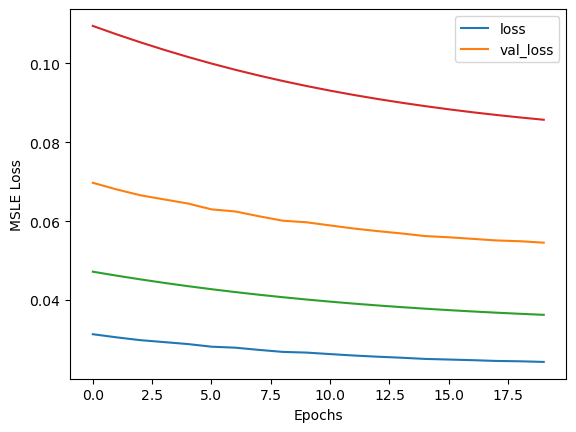

In [13]:
plt.plot(h.history['loss'])
plt.plot(h.history['mse'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['val_mse'])
plt.legend([ 'loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.show()

In [14]:
def find_threshold(model,x_train_scaled):

    recons = model.predict(x_train_scaled)

    recons_error = tf.keras.metrics.msle(recons,x_train_scaled)

    threshold = np.mean(recons_error.numpy()) + np.std(recons_error.numpy())
    return threshold

In [15]:
def get_pred(model,x_test_scaled, threshold):

    pred = model.predict(x_test_scaled)

    error = tf.keras.metrics.msle(pred,x_test_scaled)
    AnomalyMask = pd.Series(error)>threshold

    return AnomalyMask.map(lambda x:0.0 if x==True else 1.0)

In [16]:
threshold = find_threshold(model,x_train_scaled)
print (threshold)

12/12 [==============================] - 0s 1ms/step
0.03173366546052349


In [17]:
from sklearn.metrics import accuracy_score

pred = get_pred(model,x_test_scaled, threshold)

2226/2226 [==============================] - 2s 748us/step


In [18]:
accuracy_score(pred,y_test)

0.9549310412628859